<a href="https://colab.research.google.com/github/StellaDuarte/Machine-Learning/blob/main/Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Seleção do Banco de Dados:

O banco de dados escolhido foi o de dados do Instituto Nacional de Meteorologia. A solicitação do banco de dados foi feita através do link: [INMET :: BDMEP](https://bdmep.inmet.gov.br/), onde o requisitante solicita os dados desejados e depois de algum tempo recebe um e-mail com as informações desejadas para download. No caso, a solicitação feita foi a de dados meteorológicos dos últimos 23 anos da cidade de Resende.

In [189]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [190]:
import pandas as pd
tab = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/dados tempo em Resende 2.csv', sep=';', encoding='iso-8859-1')
tab.head()

,Data Medicao,EVAPORACAO DO PICHE(mm),INSOLACAO TOTAL(h),PRECIPITACAO TOTAL(mm),TEMPERATURA MAXIMA(°C),TEMPERATURA MEDIA COMPENSADA(°C),TEMPERATURA MINIMA(°C),UMIDADE RELATIVA DO AR MEDIA (%),UMIDADE RELATIVA DO AR MINIMA (%),VENTO VELOCIDADE MEDIA (m/s)
0,01/01/2000,NaN,0,58,27,"22,62","20,3","95,5",86,"1,933333"
1,02/01/2000,NaN,0,"58,9",22,"20,36","19,2",100,98,"0,766667"
2,03/01/2000,NaN,0,"138,7","23,6","21,4","18,6","97,75",97,"0,433333"
3,04/01/2000,NaN,"0,8","18,6","27,6","22,88","18,8","91,75",77,0
4,05/01/2000,NaN,6,"8,1","32,2","24,32","19,4","78,25",47,"1,066667"


In [191]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8771 entries, 0 to 8770
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Data Medicao                       8771 non-null   object
 1   EVAPORACAO DO PICHE(mm)            7507 non-null   object
 2   INSOLACAO TOTAL(h)                 7972 non-null   object
 3   PRECIPITACAO TOTAL(mm)             8403 non-null   object
 4   TEMPERATURA MAXIMA(°C)             7916 non-null   object
 5   TEMPERATURA MEDIA COMPENSADA(°C)   6923 non-null   object
 6   TEMPERATURA MINIMA(°C)             8160 non-null   object
 7   UMIDADE RELATIVA DO AR MEDIA (%)   5780 non-null   object
 8   UMIDADE RELATIVA DO AR MINIMA (%)  8048 non-null   object
 9   VENTO VELOCIDADE MEDIA (m/s)       5405 non-null   object
dtypes: object(10)
memory usage: 685.4+ KB


A seguir algumas informações importantes para a correta interpretação das variáveis que aparecem nesta base de dados:

* **EVAPORAÇÃO DO PICHE, DIÁRIA (mm)**: Refere-se à quantidade de água que evapora de uma superfície porosa úmida, medida em milímetros por dia. É comumente medida usando um instrumento chamado evaporímetro de Piche.
* **INSOLAÇÃO TOTAL, DIÁRIO (h)**: Representa o número de horas durante o dia em que o disco solar é visível para um observador situado à superfície terrestre, em um local com horizonte desobstruído.
* **PRECIPITAÇÃO TOTAL, DIÁRIO (mm)**: É a quantidade de água de chuva que atinge o solo horizontal ou o plano de projeção do solo horizontal da superfície da Terra, em um determinado período ou tempo, e é expressa como uma profundidade vertical da água.
* **TEMPERATURA MÁXIMA, DIÁRIA (°C)**: É a temperatura mais alta registrada em um determinado dia.
* **TEMPERATURA MÉDIA COMPENSADA, DIÁRIA (°C)**: É uma média calculada a partir de três leituras de temperatura, mais a temperatura máxima e mínima do dia. Essa média compensa a falta de dados de temperatura em certos períodos do dia.
* **TEMPERATURA MÍNIMA, DIÁRIA (°C)**: É a temperatura mais baixa registrada em um determinado dia.
* **UMIDADE RELATIVA DO AR, MÉDIA DIÁRIA (%)**: É a média diária do teor de vapor de água do ar a uma determinada temperatura, expresso como uma porcentagem do teor de vapor de água que seria necessário para a saturação a essa temperatura.
* **UMIDADE RELATIVA DO AR, MÍNIMA DIÁRIA (%)**: É o menor teor de vapor de água do ar registrado em um determinado dia, expresso como uma porcentagem da quantidade necessária para a saturação a essa temperatura.
* **VENTO, VELOCIDADE MÉDIA DIÁRIA (m/s)**: É a média da velocidade do vento medida ao longo de um dia, expressa em metros por segundo. Geralmente, é medida por um instrumento chamado anemômetro.

## Limpeza de dados

Das 8.771 linhas de dados podemos perceber que em todas as colunas temos campos que estão com os valores vazios. Vamos substituir a informação 'null' por '0' para facilitar as análises.

In [192]:
# Substituir 'null' por '0' em todas as colunas usando o método replace
tab = tab.replace('null', '0')
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8771 entries, 0 to 8770
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Data Medicao                       8771 non-null   object
 1   EVAPORACAO DO PICHE(mm)            7507 non-null   object
 2   INSOLACAO TOTAL(h)                 7972 non-null   object
 3   PRECIPITACAO TOTAL(mm)             8403 non-null   object
 4   TEMPERATURA MAXIMA(°C)             7916 non-null   object
 5   TEMPERATURA MEDIA COMPENSADA(°C)   6923 non-null   object
 6   TEMPERATURA MINIMA(°C)             8160 non-null   object
 7   UMIDADE RELATIVA DO AR MEDIA (%)   5780 non-null   object
 8   UMIDADE RELATIVA DO AR MINIMA (%)  8048 non-null   object
 9   VENTO VELOCIDADE MEDIA (m/s)       5405 non-null   object
dtypes: object(10)
memory usage: 685.4+ KB


Para esta análise, iremos também desconsiderar as linhas que possuem informação faltante, para podermos trabalhar com valores reais.

In [193]:
# Filtrar as linhas que contêm valores vazios em qualquer uma das colunas usando o método dropna e o argumento any
tab = tab.dropna(subset=colunas, how='any')
tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4375 entries, 32 to 6547
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Data Medicao                       4375 non-null   object
 1   EVAPORACAO DO PICHE(mm)            4375 non-null   object
 2   INSOLACAO TOTAL(h)                 4375 non-null   object
 3   PRECIPITACAO TOTAL(mm)             4375 non-null   object
 4   TEMPERATURA MAXIMA(°C)             4375 non-null   object
 5   TEMPERATURA MEDIA COMPENSADA(°C)   4375 non-null   object
 6   TEMPERATURA MINIMA(°C)             4375 non-null   object
 7   UMIDADE RELATIVA DO AR MEDIA (%)   4375 non-null   object
 8   UMIDADE RELATIVA DO AR MINIMA (%)  4375 non-null   object
 9   VENTO VELOCIDADE MEDIA (m/s)       4375 non-null   object
dtypes: object(10)
memory usage: 376.0+ KB


## Visualização dos Dados

Vamos criar alguns gráficos para gerar visualizações na tentativa de identificar padrões, tendências e outiliers


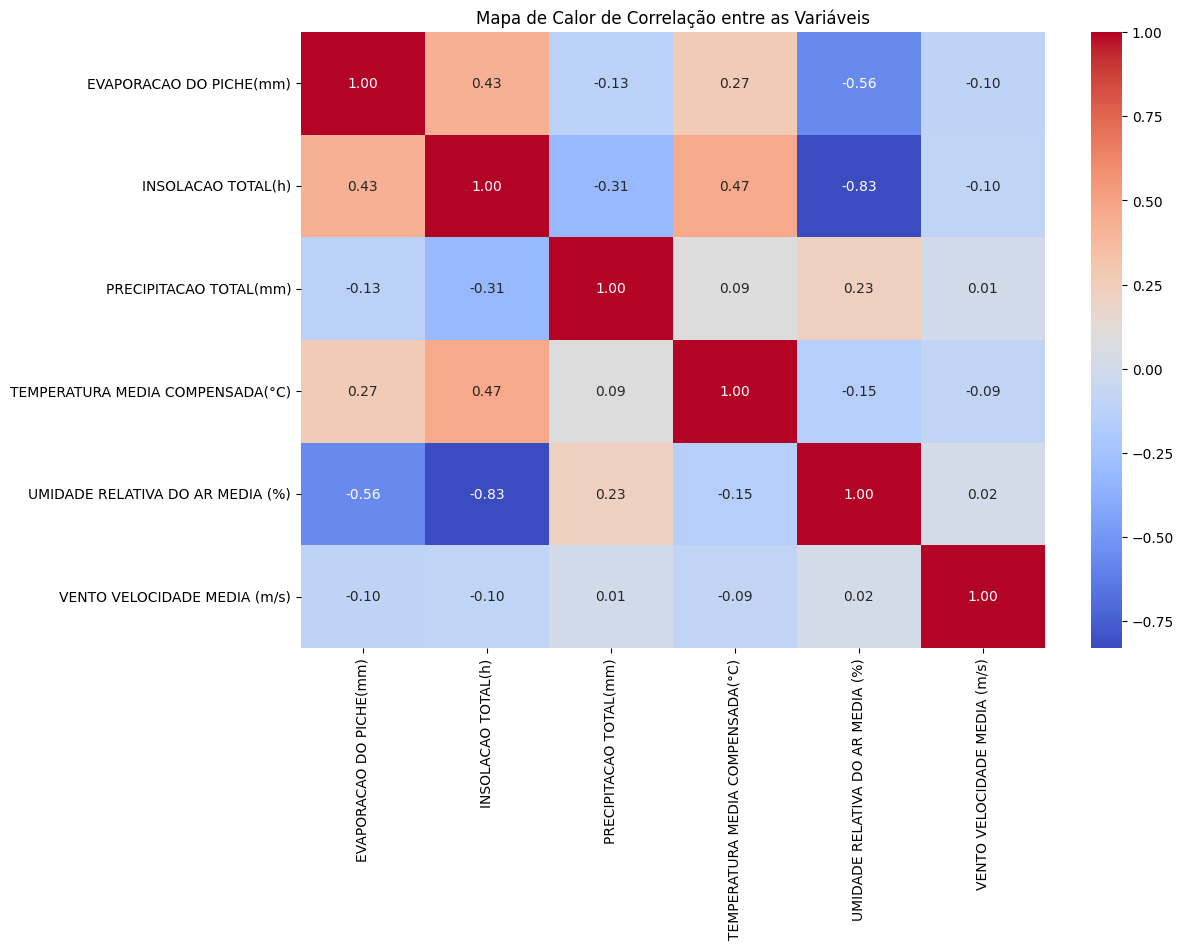

In [194]:
# Mapa de calor de correlação entre as colunas, exluíndo as colunas com informação de datas e de máximo e mínimo. Iremos analisar apenas os valores médios.

import seaborn as sns
import matplotlib.pyplot as plt


# Remover as colunas que não serão analisadas
tab_numeric = tab.drop(columns=['Data Medicao','TEMPERATURA MAXIMA(°C)', 'TEMPERATURA MINIMA(°C)', 'UMIDADE RELATIVA DO AR MINIMA (%)'])

# Converter todas as colunas restantes para tipo numérico (se possível)
tab_numeric = tab_numeric.apply(pd.to_numeric, errors='coerce')

# Criar uma matriz de correlação
correlation_matrix = tab_numeric.corr()

# Configurar o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar o mapa de calor
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adicionar título
plt.title('Mapa de Calor de Correlação entre as Variáveis')

# Mostrar o mapa de calor
plt.show()

O mapa de calor vai destacar visualmente a intensidade e direção da correlação entre as variáveis. Quanto mais próximo de 1 ou -1, maior é a correlação, sendo 1 uma correlação positiva perfeita e -1 uma correlação negativa perfeita. Um valor próximo de 0 indica uma correlação fraca entre as variáveis:

* 1: Correlação positiva perfeita. Quando uma variável aumenta, a outra variável também aumenta na mesma proporção.
* 0.7 a 0.9: Correlação positiva forte.
* 0.5 a 0.7: Correlação positiva moderada.
* 0.3 a 0.5: Correlação positiva fraca.
* 0: Sem correlação (as variáveis não têm relação linear)
* -0.3 a -0.5: Correlação negativa fraca.
* -0.5 a -0.7: Correlação negativa moderada.
* -0.7 a -0.9: Correlação negativa forte.
* -1: Correlação negativa perfeita. Quando uma variável aumenta, a outra variável diminui na mesma proporção.

Nesse sentido podemos avaliar da seguinte forma os resultado que chamaram mais a atenção:

* Correlação positiva moderada entre a temperatura média e insolação
* Correlação positiva moderada entre a insolação e evaporação
* Correlação positiva fraca entre a temperatura média e a evaporação
* Correlação negativa moderada entre umidade relativa do ar e evaporação
* correlação negativa forte entre umidade relativa e insolação.

Vamos tratar aqui como insolação a capacidade de ver o sol - tempo nublado ou não - e evaporação do piche como sendo a capacidade de evaporação em geral.

## Estatísticas Descritivas

Vamos verificar agora como a média das temperaturas se comportam ao longo dos meses. Primeiramente em uma visão geral:

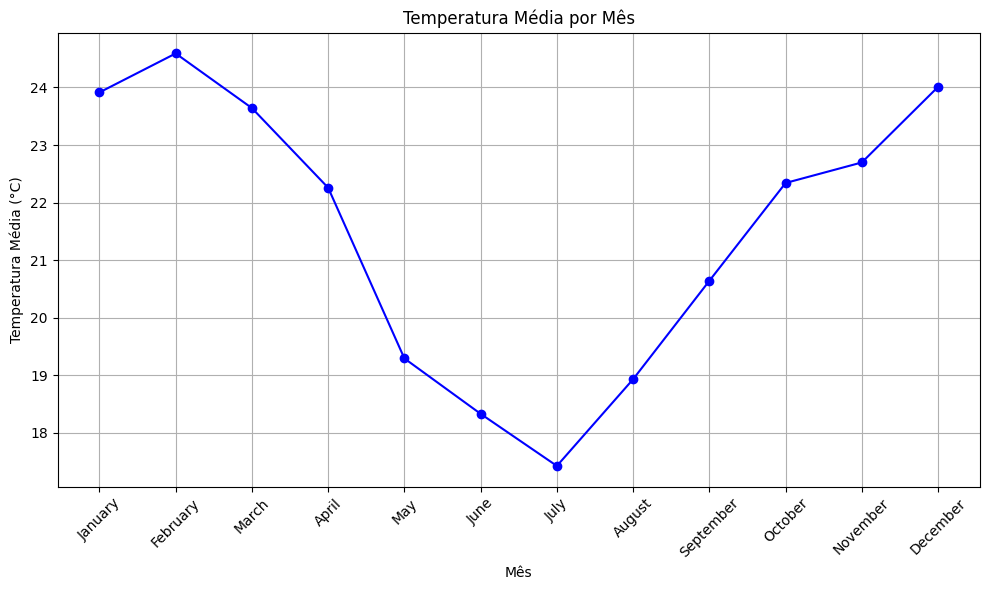

In [195]:
import pandas as pd
import matplotlib.pyplot as plt


# Converter a coluna 'Data Medicao' para o tipo datetime
tab['Data Medicao'] = pd.to_datetime(tab['Data Medicao'], format='%d/%m/%Y')

# Criar uma nova coluna 'Mes_Texto' que contém o mês em texto
tab['Mes_Texto'] = tab['Data Medicao'].dt.strftime('%B')  # %B representa o nome completo do mês

# Corrigir o formato dos valores na coluna 'TEMPERATURA MEDIA COMPENSADA(°C)'
tab['TEMPERATURA MEDIA COMPENSADA(°C)'] = tab['TEMPERATURA MEDIA COMPENSADA(°C)'].str.replace(',', '.').astype(float)

# Calcular a temperatura média por mês
temperatura_por_mes = tab.groupby('Mes_Texto')['TEMPERATURA MEDIA COMPENSADA(°C)'].mean()

# Ordenar os meses de acordo com a ordem do calendário
ordem_meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
temperatura_por_mes = temperatura_por_mes.reindex(ordem_meses)

# Criar o gráfico de linha da temperatura média por mês
plt.figure(figsize=(10, 6))
plt.plot(temperatura_por_mes.index, temperatura_por_mes.values, marker='o', linestyle='-', color='b')

# Adicionar rótulos e título ao gráfico
plt.xlabel('Mês')
plt.ylabel('Temperatura Média (°C)')
plt.title('Temperatura Média por Mês')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

In [196]:
print(tab['TEMPERATURA MAXIMA(°C)'].dtype)


object


Agora com uma visão com os máximos e mínimos de acordo com os meses do ano. Desta forma podemos ver que não existem outliers neste banco de dados.

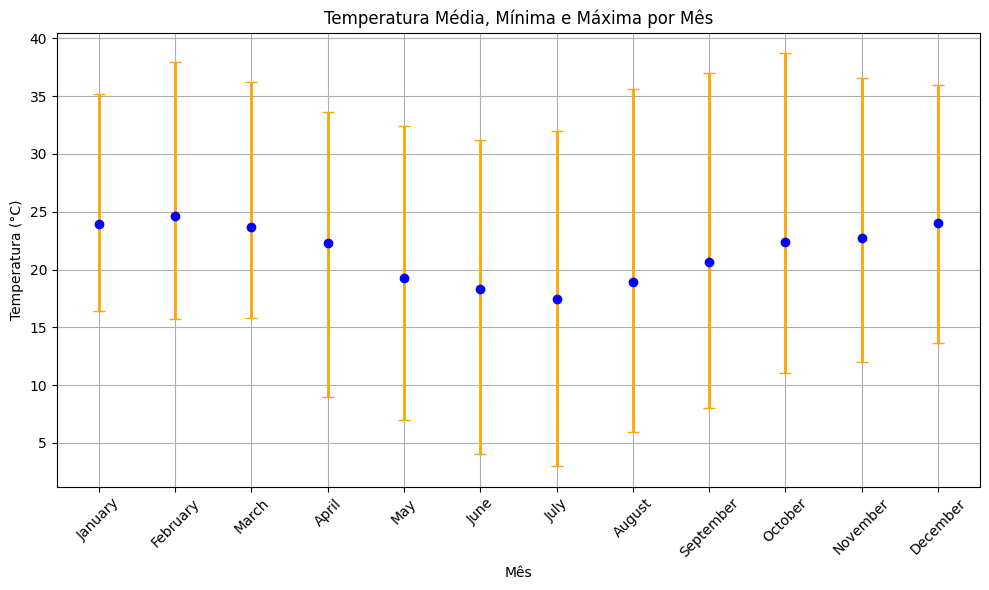

In [197]:

# Converter a coluna 'Data Medicao' para o tipo datetime
tab['Data Medicao'] = pd.to_datetime(tab['Data Medicao'], format='%d/%m/%Y')

# Corrigir o formato dos valores nas colunas de temperatura

tab['TEMPERATURA MAXIMA(°C)'] = tab['TEMPERATURA MAXIMA(°C)'].str.replace(',', '.').astype(float)
tab['TEMPERATURA MINIMA(°C)'] = tab['TEMPERATURA MINIMA(°C)'].str.replace(',', '.').astype(float)


# Criar uma nova coluna 'Mes_Texto' que contém o mês em texto
tab['Mes_Texto'] = tab['Data Medicao'].dt.strftime('%B')  # %B representa o nome completo do mês

# Calcular a temperatura média, mínima e máxima por mês
temperatura_media_por_mes = tab.groupby('Mes_Texto')['TEMPERATURA MEDIA COMPENSADA(°C)'].mean()
temperatura_minima_por_mes = tab.groupby('Mes_Texto')['TEMPERATURA MINIMA(°C)'].min()
temperatura_maxima_por_mes = tab.groupby('Mes_Texto')['TEMPERATURA MAXIMA(°C)'].max()

# Ordenar os meses de acordo com o calendário
ordem_meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
temperatura_media_por_mes = temperatura_media_por_mes.reindex(ordem_meses)
temperatura_minima_por_mes = temperatura_minima_por_mes.reindex(ordem_meses)
temperatura_maxima_por_mes = temperatura_maxima_por_mes.reindex(ordem_meses)

# Criar o gráfico de barras com barras de erro representando a variação entre os valores
plt.figure(figsize=(10, 6))

plt.errorbar(
    range(len(temperatura_media_por_mes)),
    temperatura_media_por_mes,
    yerr=[temperatura_media_por_mes - temperatura_minima_por_mes, temperatura_maxima_por_mes - temperatura_media_por_mes],
    fmt='o',
    color='b',
    ecolor='orange',
    elinewidth=2,
    capsize=4
)

# Adicionar rótulos e título ao gráfico
plt.xlabel('Mês')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Média, Mínima e Máxima por Mês')

# Definir os rótulos do eixo x e y
plt.xticks(ticks=range(len(ordem_meses)), labels=ordem_meses, rotation=45)

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

## Pré-processamento de dados

In [198]:


tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4375 entries, 32 to 6547
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Data Medicao                       4375 non-null   datetime64[ns]
 1   EVAPORACAO DO PICHE(mm)            4375 non-null   object        
 2   INSOLACAO TOTAL(h)                 4375 non-null   object        
 3   PRECIPITACAO TOTAL(mm)             4375 non-null   object        
 4   TEMPERATURA MAXIMA(°C)             4375 non-null   float64       
 5   TEMPERATURA MEDIA COMPENSADA(°C)   4375 non-null   float64       
 6   TEMPERATURA MINIMA(°C)             4375 non-null   float64       
 7   UMIDADE RELATIVA DO AR MEDIA (%)   4375 non-null   object        
 8   UMIDADE RELATIVA DO AR MINIMA (%)  4375 non-null   object        
 9   VENTO VELOCIDADE MEDIA (m/s)       4375 non-null   object        
 10  Mes_Texto                          

In [199]:
# Corrigindo todas as colunas que devem ser float64

tab['EVAPORACAO DO PICHE(mm)'] = tab['EVAPORACAO DO PICHE(mm)'].str.replace(',', '.').astype(float)
tab['INSOLACAO TOTAL(h)'] = tab['INSOLACAO TOTAL(h)'].str.replace(',', '.').astype(float)
tab['PRECIPITACAO TOTAL(mm)'] = tab['PRECIPITACAO TOTAL(mm)'].str.replace(',', '.').astype(float)
tab['UMIDADE RELATIVA DO AR MEDIA (%)'] = tab['UMIDADE RELATIVA DO AR MEDIA (%)'].str.replace(',', '.').astype(float)
tab['UMIDADE RELATIVA DO AR MINIMA (%)'] = tab['UMIDADE RELATIVA DO AR MINIMA (%)'].str.replace(',', '.').astype(float)
tab['VENTO VELOCIDADE MEDIA (m/s)'] = tab['VENTO VELOCIDADE MEDIA (m/s)'].str.replace(',', '.').astype(float)
tab = tab.drop('Mes_Texto', axis=1)

tab.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4375 entries, 32 to 6547
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Data Medicao                       4375 non-null   datetime64[ns]
 1   EVAPORACAO DO PICHE(mm)            4375 non-null   float64       
 2   INSOLACAO TOTAL(h)                 4375 non-null   float64       
 3   PRECIPITACAO TOTAL(mm)             4375 non-null   float64       
 4   TEMPERATURA MAXIMA(°C)             4375 non-null   float64       
 5   TEMPERATURA MEDIA COMPENSADA(°C)   4375 non-null   float64       
 6   TEMPERATURA MINIMA(°C)             4375 non-null   float64       
 7   UMIDADE RELATIVA DO AR MEDIA (%)   4375 non-null   float64       
 8   UMIDADE RELATIVA DO AR MINIMA (%)  4375 non-null   float64       
 9   VENTO VELOCIDADE MEDIA (m/s)       4375 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
me

## Regressão Linear

Utilizando a regressão linear como método de prever as futuras temperaturas máximas, médias e mínimas para 2024

In [200]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np


# Certifique-se de que 'Data Medicao' é do tipo datetime
tab['Data Medicao'] = pd.to_datetime(tab['Data Medicao'])

# Crie uma coluna para o mês
tab['Mes'] = tab['Data Medicao'].dt.month

# Separe os dados de treino
X_train = tab[['Mes']]
y_train_max = tab['TEMPERATURA MAXIMA(°C)']
y_train_media = tab['TEMPERATURA MEDIA COMPENSADA(°C)']
y_train_min = tab['TEMPERATURA MINIMA(°C)']

# Inicialize e ajuste o modelo de regressão linear para cada temperatura
model_max = LinearRegression()
model_media = LinearRegression()
model_min = LinearRegression()

model_max.fit(X_train, y_train_max)
model_media.fit(X_train, y_train_media)
model_min.fit(X_train, y_train_min)

# Crie um DataFrame para os meses de 2024
meses_2024 = pd.DataFrame({'Mes': np.arange(1, 13)})  # Meses de 1 a 12

# Faça previsões para os meses de 2024 para cada temperatura
previsoes_2024_max = model_max.predict(meses_2024)
previsoes_2024_media = model_media.predict(meses_2024)
previsoes_2024_min = model_min.predict(meses_2024)

# Crie um DataFrame com as previsões para temperatura em cada mês de 2024
previsoes_2024_df = pd.DataFrame({
    'Mes': meses_2024['Mes'],
    'TEMPERATURA MAXIMA(°C) Prevista': previsoes_2024_max,
    'TEMPERATURA MEDIA COMPENSADA(°C) Prevista': previsoes_2024_media,
    'TEMPERATURA MINIMA(°C) Prevista': previsoes_2024_min
})

# Arredondar os valores para uma casa decimal
previsoes_2024_df_rounded = previsoes_2024_df.round(1)

# Imprimir todas as linhas do DataFrame sem exibir os índices
print(previsoes_2024_df_rounded.to_string(index=False))



 Mes  TEMPERATURA MAXIMA(°C) Prevista  TEMPERATURA MEDIA COMPENSADA(°C) Prevista  TEMPERATURA MINIMA(°C) Prevista
   1                             28.0                                       21.7                             17.3
   2                             28.0                                       21.6                             17.2
   3                             27.9                                       21.6                             17.2
   4                             27.9                                       21.5                             17.1
   5                             27.9                                       21.5                             17.1
   6                             27.9                                       21.5                             17.0
   7                             27.8                                       21.4                             17.0
   8                             27.8                                       21.4        

In [201]:
previsoes_2024_df_rounded.head()

,Mes,TEMPERATURA MAXIMA(°C) Prevista,TEMPERATURA MEDIA COMPENSADA(°C) Prevista,TEMPERATURA MINIMA(°C) Prevista
0,1,28.0,21.7,17.3
1,2,28.0,21.6,17.2
2,3,27.9,21.6,17.2
3,4,27.9,21.5,17.1
4,5,27.9,21.5,17.1


Calculando o erro quadrático médio de cada temperatura prevista:

In [202]:
from sklearn.metrics import mean_squared_error

# Calcular o erro quadrático médio (EQM) para cada previsão
eqm_max = mean_squared_error(tab['TEMPERATURA MAXIMA(°C)'], model_max.predict(X_train))
eqm_media = mean_squared_error(tab['TEMPERATURA MEDIA COMPENSADA(°C)'], model_media.predict(X_train))
eqm_min = mean_squared_error(tab['TEMPERATURA MINIMA(°C)'], model_min.predict(X_train))

print(f'Erro Quadrático Médio para TEMPERATURA MAXIMA(°C): {eqm_max:.2f}')
print(f'Erro Quadrático Médio para TEMPERATURA MEDIA COMPENSADA(°C): {eqm_media:.2f}')
print(f'Erro Quadrático Médio para TEMPERATURA MINIMA(°C): {eqm_min:.2f}')



Erro Quadrático Médio para TEMPERATURA MAXIMA(°C): 16.71
Erro Quadrático Médio para TEMPERATURA MEDIA COMPENSADA(°C): 9.39
Erro Quadrático Médio para TEMPERATURA MINIMA(°C): 11.82
